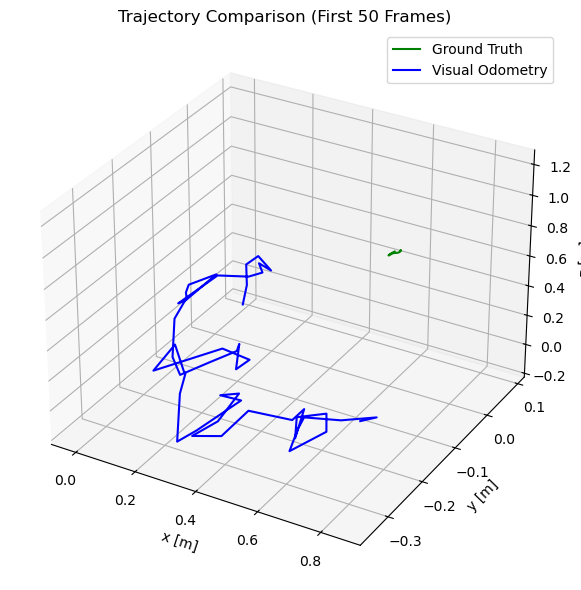

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from pathlib import Path

# === CONFIGURE YOUR PATHS HERE ===
image_folder = Path("dataset-stereo/dso/cam0/images")  # <-- Replace this
gt_csv_path = Path("dataset-stereo/dso/gt_imu.csv")    # <-- Replace this


# === Read Ground Truth Data ===
gt_df = pd.read_csv(gt_csv_path, comment='#', header=None)
gt_df.columns = ['timestamp', 'tx', 'ty', 'tz', 'qw', 'qx', 'qy', 'qz']
gt_df['timestamp'] = gt_df['timestamp'].astype(np.int64)

# === Extract Timestamps from Image Filenames (First 50 Images) ===
image_filenames = sorted([
    f for f in os.listdir(image_folder)
    if f.endswith('.png') or f.endswith('.jpg')
])
image_filenames = image_filenames[:50]  # limit to first 50
image_timestamps = [int(Path(f).stem) for f in image_filenames]

# === Match Closest GT Pose for Each Image Timestamp ===
gt_matched = []
for t in image_timestamps:
    idx = np.argmin(np.abs(gt_df['timestamp'] - t))
    row = gt_df.iloc[idx]
    gt_matched.append([row['tx'], row['ty'], row['tz']])

gt_matched = np.array(gt_matched)

# === Load Your Estimated Trajectory ===
# Replace with your actual VO trajectory (first 50 poses)
# Example:
# vo_traj = np.array([[0, 0, 0], [0.1, 0.01, 0], ...])
# Ensure it is a (50, 3) numpy array

# Dummy example (replace with your real VO output!)
vo_traj = np.cumsum(np.random.randn(50, 3) * 0.05, axis=0)

# === Plot Estimated vs Ground Truth Trajectory ===
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(gt_matched[:, 0], gt_matched[:, 1], gt_matched[:, 2], label='Ground Truth', color='green')
ax.plot(vo_traj[:, 0], vo_traj[:, 1], vo_traj[:, 2], label='Visual Odometry', color='blue')

ax.set_title('Trajectory Comparison (First 50 Frames)')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

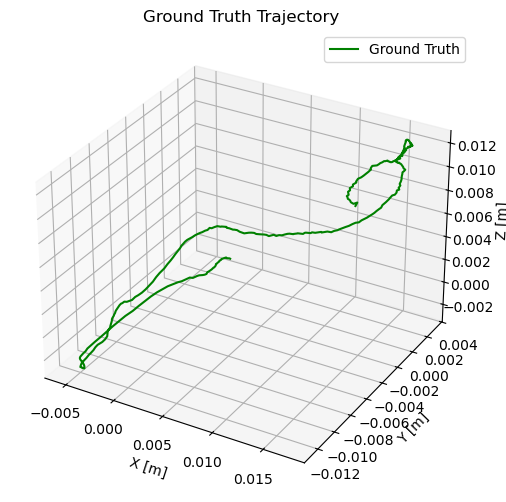

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from mpl_toolkits.mplot3d.art3d import Line3D

# === Load and Prepare Ground Truth Data ===
gt_csv_path = 'dataset-stereo/dso/gt_imu.csv'  # Replace with your path
data = pd.read_csv(gt_csv_path)
#timestamps = data[0].values
tx = data["tx"].values
ty = data["ty"].values
tz = data["tz"].values

tx = tx - tx[0]  # Normalize to start at zero
ty = ty - ty[0]
tz = tz - tz[0]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(tx[:359], ty[:359], tz[:359], label='Ground Truth', color='green')
ax.set_title('Ground Truth Trajectory')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.legend()
plt.show()